# Stock Market Prediction using Numerical and Textual Analysis

### by Shuvam Mohapatra

## Objective: Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines

### ● Stock to analyze and predict - SENSEX (S&P BSE SENSEX)

### ● Historical stock prices from https://in.finance.yahoo.com/
### ● Textual (news) data from https://bit.ly/36fFPI6





In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
import datetime
import pandas_datareader.data as web
import matplotlib as mpl
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from statsmodels.tsa.seasonal import seasonal_decompose


from textblob import TextBlob
from matplotlib.pyplot import figure
from matplotlib import rcParams
import plotly.express as px
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost 

In [4]:
os.chdir(r'C:\Users\Krishna\OneDrive\Desktop\Projects\Stock Market Project')

In [5]:
stocks = pd.read_csv("TCS.NS_Stock.csv")

In [6]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2537 non-null   object 
 1   Open       2529 non-null   float64
 2   High       2529 non-null   float64
 3   Low        2529 non-null   float64
 4   Close      2529 non-null   float64
 5   Adj Close  2529 non-null   float64
 6   Volume     2529 non-null   float64
dtypes: float64(6), object(1)
memory usage: 138.9+ KB


In [7]:
stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,23-09-2010,470.000000,472.649994,463.899994,465.674988,379.662506,3327236.0
1,24-09-2010,466.549988,468.950012,462.500000,465.975006,379.907043,2738784.0
2,27-09-2010,467.500000,470.725006,461.000000,463.799988,378.133820,3423290.0
3,28-09-2010,462.625000,465.149994,457.049988,459.825012,374.892914,2521714.0
4,29-09-2010,462.500000,468.625000,457.450012,460.174988,375.178375,3370194.0


In [8]:
stocks=stocks.drop_duplicates()
stocks['Date']=pd.to_datetime(stocks['Date']).dt.normalize()
stocks=stocks.filter(['Date','Close','Open','High','Low','Vol.'])
stocks.set_index('Date', inplace=True)
stocks=stocks.sort_index(ascending=True, axis=0)
stocks


,Close,Open,High,Low
Date,,,,
2010-01-10,480.799988,463.500000,483.000000,461.000000
2010-01-11,526.700012,526.025024,533.200012,524.549988
2010-01-12,540.950012,532.000000,546.599976,532.000000
2010-02-11,524.724976,527.500000,530.000000,521.849976
2010-02-12,547.900024,545.500000,549.599976,537.525024
...,...,...,...,...
2020-12-23,2908.750000,2876.050049,2919.000000,2865.449951
2020-12-24,2909.350098,2909.000000,2921.350098,2883.199951
2020-12-28,2929.399902,2910.000000,2949.699951,2902.000000


In [9]:
stocks.reset_index(inplace=True) #Resetting the index
stocks.head()

,Date,Close,Open,High,Low
0,2010-01-10,480.799988,463.500000,483.000000,461.000000
1,2010-01-11,526.700012,526.025024,533.200012,524.549988
2,2010-01-12,540.950012,532.000000,546.599976,532.000000
3,2010-02-11,524.724976,527.500000,530.000000,521.849976
4,2010-02-12,547.900024,545.500000,549.599976,537.525024


In [10]:

# Checking the dimension of the dataset
stocks.shape

(2537, 5)

In [11]:
stocks.describe()

,Close,Open,High,Low
count,2529.000000,2529.000000,2529.000000,2529.000000
mean,1285.433225,1285.879417,1300.011385,1271.019695
std,577.505682,578.091900,584.068323,571.286989
min,459.024994,460.424988,465.000000,434.500000
25%,736.224976,735.049988,747.549988,728.700012
50%,1233.849976,1235.849976,1245.925049,1222.875000
75%,1744.250000,1745.000000,1766.574951,1720.099976
max,2930.500000,2934.399902,2952.000000,2920.000000


In [12]:
# Data cleaning
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks.head()

,Date,Close,Open,High,Low
0,2010-01-10,480.799988,463.500000,483.000000,461.000000
1,2010-01-11,526.700012,526.025024,533.200012,524.549988
2,2010-01-12,540.950012,532.000000,546.599976,532.000000
3,2010-02-11,524.724976,527.500000,530.000000,521.849976
4,2010-02-12,547.900024,545.500000,549.599976,537.525024


In [24]:
stocks.dropna(inplace=True)

In [25]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2529 entries, 0 to 2536
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2529 non-null   datetime64[ns]
 1   Close   2529 non-null   float64       
 2   Open    2529 non-null   float64       
 3   High    2529 non-null   float64       
 4   Low     2529 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 118.5 KB


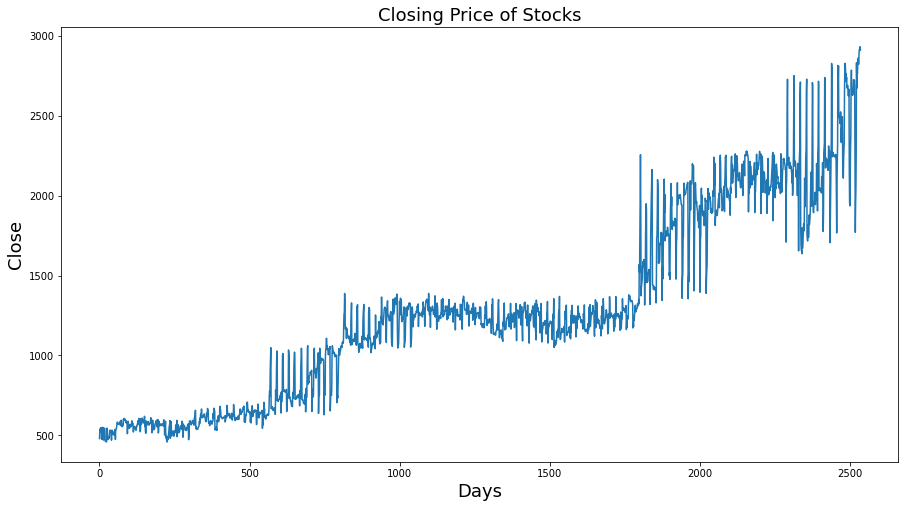

In [26]:
# The data -Closing Price

plt.figure(figsize=(15,8))
plt.title('Closing Price of Stocks', fontsize = 18)
plt.xlabel('Days', fontsize= 18)
plt.ylabel('Close', fontsize = 18)
plt.plot(stocks['Close'])
plt.show()

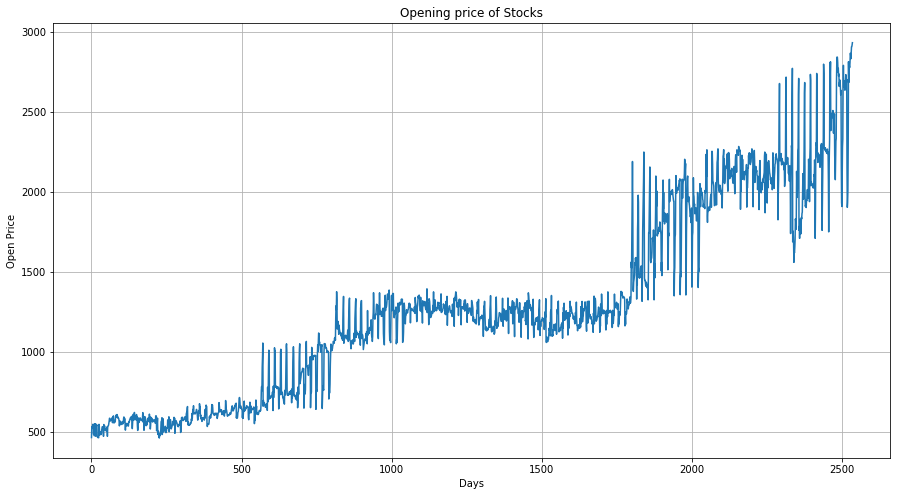

In [27]:
# The data -Open Price
plt.figure(figsize=(15,8))
plt.grid(True)
plt.plot(stocks['Open'])
plt.xlabel('Days')
plt.ylabel('Open Price')
plt.title('Opening price of Stocks')
plt.show()

Text(0.5, 1.0, 'Stock Returns')

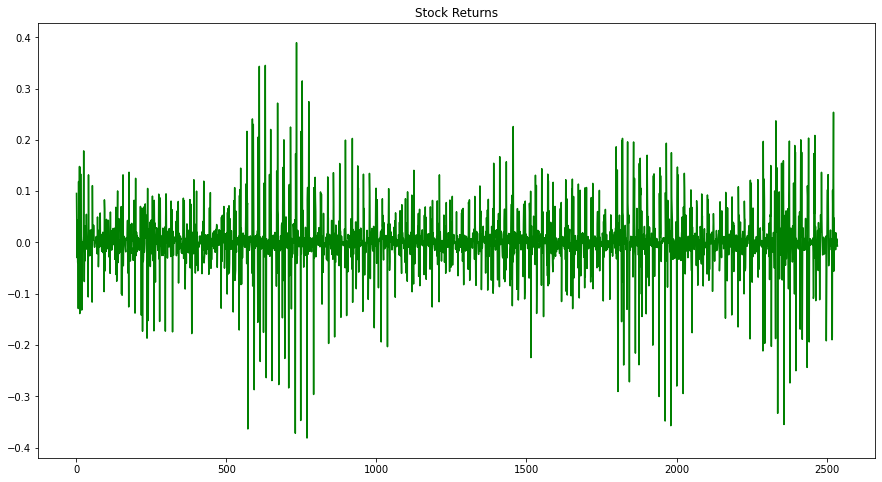

In [28]:
# Stocks returns
close = stocks['Close']
returns = close / close.shift(1) - 1

plt.figure(figsize = (15,8))
returns.plot(label='Return', color = 'g')
plt.title("Stock Returns")

# Time series Analysis -For Close Price

In [29]:
#splitting the data
train = stocks[:1600]
test = stocks[1600:]

In [30]:
train.shape


(1600, 5)

In [31]:
test.shape

(929, 5)

# Dickey-Fuller test

In [32]:
def adfullerTest(X):
    result = adfuller(X,autolag = 'AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('No of Lags Used: %f' % result[2])
    print('Number of Obs Used: %f' % result[3])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if result[1] <=0.05 :
         print("Reject against the null hypothesis, time series is stationary")
    else:
        print("Accept null hypothesis, time series is non-stationary ")

In [33]:
adfullerTest(train['Close'])

ADF Statistic: -1.122026
p-value: 0.706209
No of Lags Used: 22.000000
Number of Obs Used: 1577.000000
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568
Accept null hypothesis, time series is non-stationary 


Text(0.5, 1.0, 'Mean and Standard Deviation on  transformed data')

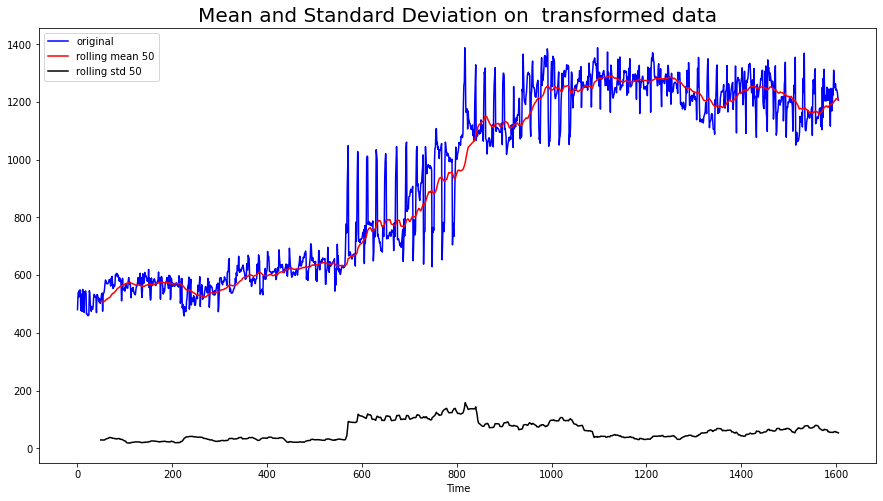

In [34]:
# Rolling Statistics
rolling_mean_50 = (train['Close']).rolling(window=50).mean()
rolling_std_50 = (train['Close']).rolling(window=50).std()
plt.figure(figsize = (15,8))
plt.plot((train['Close']), color = 'blue', label = 'original')
plt.plot(rolling_mean_50, color = 'red', label = 'rolling mean 50')
plt.plot(rolling_std_50, color = 'black', label = 'rolling std 50')
plt.xlabel('Time')
plt.legend()
plt.title('Mean and Standard Deviation on  transformed data',  fontsize = 20)

In [35]:
train_log = np.log(train['Close']) 
test_log = np.log(test['Close'])

In [36]:
train_log.shape

(1600,)

In [37]:
test_log.shape

(929,)

In [38]:
from numpy import log
adfullerTest(log(train['Close']))

ADF Statistic: -1.438179
p-value: 0.563842
No of Lags Used: 22.000000
Number of Obs Used: 1577.000000
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568
Accept null hypothesis, time series is non-stationary 


Running this shows a negative value for the test statistic.

We can see that the value is larger than the critical values, again, meaning that we can fail to reject the null hypothesis and in turn that the time series is non-stationary.

Text(0.5, 1.0, 'Mean and Standard Deviation on Log transformed data')

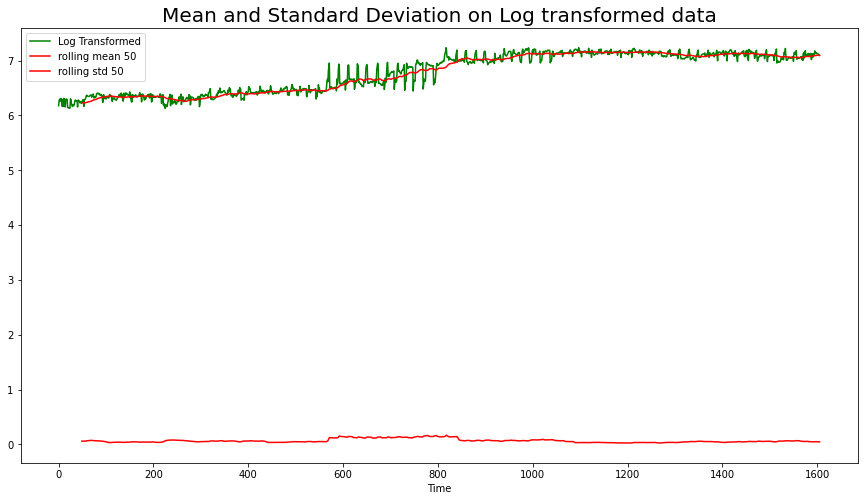

In [39]:
rolling_mean_50 = log(train['Close']).rolling(window=50).mean()
rolling_std_50 = log(train['Close']).rolling(window=50).std()
plt.figure(figsize = (15,8))
plt.plot(log(train['Close']), color = 'g', label = 'Log Transformed')
plt.plot(rolling_mean_50, color = 'r', label = 'rolling mean 50')
plt.plot(rolling_std_50, color = 'r', label = 'rolling std 50')
plt.xlabel('Time')
plt.legend()
plt.title('Mean and Standard Deviation on Log transformed data',  fontsize = 20)

To Removing Linear Trend

We will now perform the first difference transformation to our series to remove the linear trend.

In [40]:
mean_log = log(train['Close']).rolling(50).mean()

In [41]:
train_log_diff = log(train['Close']) - mean_log
train_log_diff.dropna(inplace = True)
adfullerTest(train_log_diff)

ADF Statistic: -5.433972
p-value: 0.000003
No of Lags Used: 22.000000
Number of Obs Used: 1528.000000
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568
Reject against the null hypothesis, time series is stationary


Text(0.5, 1.0, 'Mean and Standard Deviation on Differential Log Transformed data')

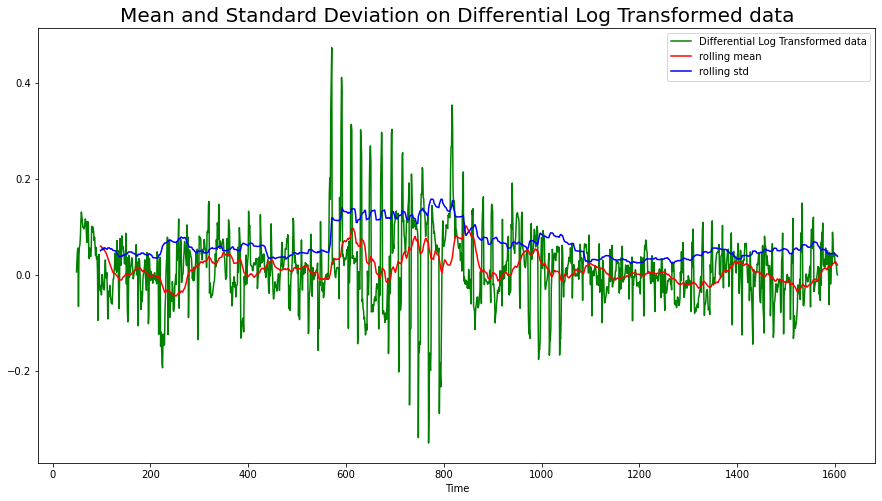

In [42]:
data=   train_log_diff
mean = data.rolling(50).mean()
std = data.rolling(50).std()
plt.figure(figsize = (15,8))
plt.plot(data, color = 'g', label = 'Differential Log Transformed data')
plt.plot(mean, color = 'r', label = 'rolling mean')
plt.plot(std, color = 'b', label = 'rolling std')
plt.xlabel('Time')
plt.legend()
plt.title('Mean and Standard Deviation on Differential Log Transformed data',  fontsize = 20)

# ARIMA Model

In [45]:
import pmdarima as pmd

def arimamodel(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, 
                             # start_p=1, 
                              #start_q=1,
                              #test="adf",
                              trace=True,
                              error_action = 'ignore',
                              suppress_warnings = True)
    return autoarima_model

In [46]:
stocks_arima = arimamodel((train_log))
stocks_arima.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-4612.740, Time=3.65 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4382.785, Time=0.44 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4419.036, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-4429.464, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4384.645, Time=0.33 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-4615.102, Time=4.36 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-4462.264, Time=1.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-4616.567, Time=2.36 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-4615.226, Time=2.65 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-4431.674, Time=0.30 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-4610.222, Time=0.51 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 16.493 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1600
Model:               SARIMAX(1, 1, 1)   Log Likelihood                2312.283
Date:                Sun, 25 Jul 2021   AIC                          -4616.567
Time:                        21:31:24   BIC                          -4595.058
Sample:                             0   HQIC                         -4608.580
                               - 1600                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0002   7.06e-05      2.693      0.007    5.18e-05       0.000
ar.L1          0.6537      0.017     39.505      0.000       0.621       0.686
ma.L1         -0.9572      0.009   -110.927      0.000      -0.974      -0.940
sigma2         0.0032   5.38e-05     60.303      0.000       0.003       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):              8255.44
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.95
Prob(H) (two-sided):                  0.02   Kurtosis:                        13.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

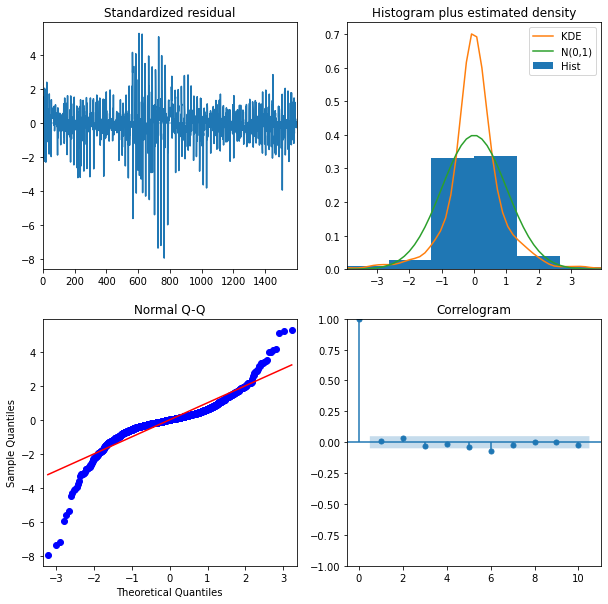

In [47]:
stocks_arima.plot_diagnostics(figsize=(10,10))
plt.show()

In [48]:
# Predictions on test data 

predict_ClosePrice = stocks_arima.predict(n_periods = len(test_log))
predict_ClosePrice = pd.DataFrame(predict_ClosePrice,index = test_log.index,columns=['predict_ClosePrice'])

Text(0, 0.5, 'Actual Stock Price')

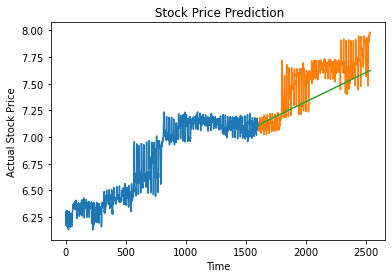

In [49]:
plt.plot(train_log, label='Train')
plt.plot(test_log, label='Test')
plt.plot(predict_ClosePrice, label='Prediction')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')

In [50]:
# Validation of the Arima Model

print('Mean Squared Error      ',mean_squared_error(test_log, predict_ClosePrice))
print('Root Mean_Squared_Error ',np.sqrt(mean_squared_error(test_log, predict_ClosePrice)))
print('Mean Absolute Error     ',mean_absolute_error(test_log, predict_ClosePrice))
print('R-Squared               ',r2_score(test_log, predict_ClosePrice))

Mean Squared Error       0.03943700273840313
Root Mean_Squared_Error  0.1985875190902065
Mean Absolute Error      0.16787716341063452
R-Squared                0.3216499466707491


# Analyzing News Dataset

In [110]:
columns=['Date','Category','News']
ndf = pd.read_csv("india-news-headlines.csv",names=columns)

In [111]:
ndf.head(5)

,Date,Category,News
0,publish_date,headline_category,headline_text
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [112]:
ndf.drop(0, inplace=True)
ndf.drop('Category', axis = 1, inplace=True)
print('Showing part of the whole dataset:')
ndf.head(-5)

Showing part of the whole dataset:


,Date,News
1,20010102,Status quo will not be disturbed at Ayodhya; s...
2,20010102,Fissures in Hurriyat over Pak visit
3,20010102,America's unwanted heading for India?
4,20010102,For bigwigs; it is destination Goa
5,20010102,Extra buses to clear tourist traffic
...,...,...
3424058,20201231,50 NRIs reach Singhu; offer help to farmers
3424059,20201231,Navjot Singh Sidhu tweets apology; says 'wore ...
3424060,20201231,Azim Premji organisation's name misused to che...
3424061,20201231,Get govt nod to probe officials: MP to agencies


In [113]:
ndf["Date"] = pd.to_datetime(ndf["Date"],format='%Y%m%d')
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3424067 entries, 1 to 3424067
Data columns (total 2 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Date    datetime64[ns]
 1   News    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 78.4+ MB


In [114]:
ndf['News'] = ndf.groupby(['Date']).transform(lambda x : ' '.join(x)) 
ndf = ndf.drop_duplicates() 
ndf.reset_index(inplace=True,drop=True)

In [115]:
ndf

,Date,News
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03,Powerless north India gropes in the dark Think...
2,2001-01-04,The string that pulled Stephen Hawking to Indi...
3,2001-01-05,Light combat craft takes India into club class...
4,2001-01-06,Light combat craft takes India into club class...
...,...,...
7257,2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...
7258,2020-12-28,Horoscope Today; 28 December 2020: Check astro...
7259,2020-12-29,Man recovers charred remains of 'thief' from h...
7260,2020-12-30,Numerology Readings 30 December 2020: Predicti...


In [116]:
ndf.isnull().sum()

Date    0
News    0
dtype: int64

In [117]:
len(ndf)

7262

In [118]:
#removing unwanted characters from the News
ndf.replace("[^a-zA-Z']"," ",regex=True,inplace=True)
ndf["News"].head(5)

0    Status quo will not be disturbed at Ayodhya  s...
1    Powerless north India gropes in the dark Think...
2    The string that pulled Stephen Hawking to Indi...
3    Light combat craft takes India into club class...
4    Light combat craft takes India into club class...
Name: News, dtype: object

In [119]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [120]:
#Adding subjectivity and polarity columns
ndf['Subjectivity'] = ndf['News'].apply(getSubjectivity)
ndf['Polarity'] = ndf['News'].apply(getPolarity)
ndf

,Date,News,Subjectivity,Polarity
0,2001-01-02,Status quo will not be disturbed at Ayodhya s...,0.286859,0.143590
1,2001-01-03,Powerless north India gropes in the dark Think...,0.392857,0.089286
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.445360,0.093039
3,2001-01-05,Light combat craft takes India into club class...,0.480553,0.264024
4,2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485
...,...,...,...,...
7257,2020-12-27,BigInterview Dhritiman Chatterjee Nobody da...,0.392082,0.042978
7258,2020-12-28,Horoscope Today December Check astro...,0.409973,0.071405
7259,2020-12-29,Man recovers charred remains of 'thief' from h...,0.415684,0.060775
7260,2020-12-30,Numerology Readings December Predicti...,0.436863,0.046930


# Merge the Historical and Textual Data

In [128]:
df_merge = pd.merge(stocks, ndf, how='inner', on='Date')
df_merge

,Date,Close,Open,High,Low,News,Subjectivity,Polarity,Compound
0,2010-01-10,480.799988,463.500000,483.000000,461.000000,Biggest style icons ever Hrithik turns Wis...,0.427957,0.096123,-0.9994
1,2010-01-11,526.700012,526.025024,533.200012,524.549988,Tress control in winters Creating a landscape...,0.396035,0.034662,-0.9994
2,2010-01-12,540.950012,532.000000,546.599976,532.000000,Avoid these mistakes when with your lady Risin...,0.434321,0.019017,-0.9996
3,2010-02-11,524.724976,527.500000,530.000000,521.849976,Aamir spends time with mom Katrina is unwell a...,0.406413,0.113370,-0.9973
4,2010-02-12,547.900024,545.500000,549.599976,537.525024,Do yoga together stay in love forever Was it ...,0.459998,0.114951,-0.9904
...,...,...,...,...,...,...,...,...,...
2524,2020-12-23,2908.750000,2876.050049,2919.000000,2865.449951,Sawmill in Makarpura GIDC gutted none hurt Ci...,0.388435,0.075967,-0.9997
2525,2020-12-24,2909.350098,2909.000000,2921.350098,2883.199951,How to set the mood for sex during cold winter...,0.387011,0.053569,-0.9988
2526,2020-12-28,2929.399902,2910.000000,2949.699951,2902.000000,Horoscope Today December Check astro...,0.409973,0.071405,-0.9998
2527,2020-12-29,2930.500000,2920.000000,2952.000000,2920.000000,Man recovers charred remains of 'thief' from h...,0.415684,0.060775,-0.9999


In [129]:
dfmerge1 = df_merge[['Close','Subjectivity', 'Polarity', 'Compound']]
dfmerge1

,Close,Subjectivity,Polarity,Compound
0,480.799988,0.427957,0.096123,-0.9994
1,526.700012,0.396035,0.034662,-0.9994
2,540.950012,0.434321,0.019017,-0.9996
3,524.724976,0.406413,0.113370,-0.9973
4,547.900024,0.459998,0.114951,-0.9904
...,...,...,...,...
2524,2908.750000,0.388435,0.075967,-0.9997
2525,2909.350098,0.387011,0.053569,-0.9988
2526,2929.399902,0.409973,0.071405,-0.9998
2527,2930.500000,0.415684,0.060775,-0.9999


# Normalizing the Data

In [131]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(dfmerge1))
df.columns = dfmerge1.columns
df.index = dfmerge1.index
df.head()

,Close,Subjectivity,Polarity,Compound
0,0.008811,0.681089,0.546021,0.00030
1,0.027382,0.457490,0.234620,0.00030
2,0.033148,0.725671,0.155354,0.00020
3,0.026583,0.530181,0.633402,0.00135
4,0.035960,0.905528,0.641415,0.00480


In [132]:
X=df.drop('Close',axis=1)
X

,Subjectivity,Polarity,Compound
0,0.681089,0.546021,0.00030
1,0.457490,0.234620,0.00030
2,0.725671,0.155354,0.00020
3,0.530181,0.633402,0.00135
4,0.905528,0.641415,0.00480
...,...,...,...
2524,0.404253,0.443899,0.00015
2525,0.394280,0.330413,0.00060
2526,0.555122,0.420785,0.00010
2527,0.595126,0.366924,0.00005


In [133]:
Y=df['Close']
Y

0       0.008811
1       0.027382
2       0.033148
3       0.026583
4       0.035960
          ...   
2524    0.991200
2525    0.991442
2526    0.999555
2527    1.000000
2528    0.991422
Name: Close, Length: 2529, dtype: float64

# Split the Dataset into Train & Test Data

In [135]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)
x_train.shape

(2023, 3)

In [136]:
x_train[:10]

,Subjectivity,Polarity,Compound
1876,0.580758,0.248507,0.00000
923,0.332576,0.275057,0.00000
2189,0.569009,0.283005,0.00005
746,0.448903,0.639992,0.00040
194,0.487292,0.315194,0.00025
189,0.529004,0.429700,0.00045
2468,0.361136,0.371264,0.00005
1762,0.250166,0.433357,0.00000
322,0.548691,0.454652,0.00025
936,0.591076,0.611404,0.99990


# A) RandomForestRegressor Model

In [137]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)

In [138]:
print(prediction[:10])
print(y_test[:10])
print('Mean Squared error: ',mean_squared_error(prediction,y_test))

[0.30395473 0.14040846 0.346537   0.15315267 0.1443734  0.39126311
 0.639641   0.18685845 0.41421267 0.24944375]
480     0.051245
2130    0.645374
1656    0.299750
330     0.038580
795     0.224734
33      0.013787
443     0.065174
2170    0.667972
1393    0.325393
1893    0.420639
Name: Close, dtype: float64
Mean Squared error:  0.0558388960903931


# B) DecisionTreeRegressor Mode

In [139]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
predictions = dtr.predict(x_test)

In [140]:
print(predictions[:10])
print(y_test[:10])
print('Mean Squared error: ',mean_squared_error(predictions,y_test))

[0.58901061 0.03918713 0.06220983 0.02587523 0.05128518 0.33473936
 0.68421694 0.23748975 0.07087873 0.11810761]
480     0.051245
2130    0.645374
1656    0.299750
330     0.038580
795     0.224734
33      0.013787
443     0.065174
2170    0.667972
1393    0.325393
1893    0.420639
Name: Close, dtype: float64
Mean Squared error:  0.09949380779619833


# C) AdaBoostRegressor Model

In [141]:
adb = AdaBoostRegressor()
adb.fit(x_train, y_train)

AdaBoostRegressor()

In [142]:
predictions = adb.predict(x_test)
print(mean_squared_error(predictions, y_test))

0.05282084170148454


# D) LGBMRegressor Model

In [146]:
import lightgbm
gbm = lightgbm.LGBMRegressor()
gbm.fit(x_train, y_train)

LGBMRegressor()

In [147]:
predictions = gbm.predict(x_test)
print(mean_squared_error(predictions, y_test))

0.054724341163773525


# E) XGBRegressor Model

In [148]:
xgb = xgboost.XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [149]:
predictions = xgb.predict(x_test)
print(mean_squared_error(predictions, y_test))

0.060385961538287534


# Conclusion

### Hybrid Model for stock price/performance prediction is Sucessfully Completed
#### - RandomForest =  0.0558388960903931
#### - DecisionTree = 0.09949380779619833
#### - AdaBoost = 0.05282084170148454
#### - LightGBM = 0.054724341163773525
#### - XGBoost = 0.060385961538287534

### It is observed that AdaBoostRegressor Model shows a better performance than the others.